# Analysis of Network Traffic Patterns

## Summer 2024 Data Science Project

### Group Members:
- Sonok Mahapatra
- Kunal Shah
- Ayush Jain
- Rohan Chawla

## 1. Introduction

In this project, we aim to analyze network traffic data collected from a honeypot server hosted on AWS. The primary objective is to identify patterns and anomalies in the network traffic, which could indicate potential security threats or unusual activities. Understanding these patterns is crucial for enhancing network security measures and mitigating risks associated with cyber attacks. By employing data science techniques, we hope to uncover insights that can help in proactive threat detection and prevention.

## 2. Data Curation

### Data Source
The dataset used in this project is derived from a honeypot server hosted on AWS. A honeypot is a security mechanism that creates a decoy to attract potential attackers and monitor their activities.

### Data Preparation
We will load the dataset, clean it, and transform it into a format suitable for analysis. This involves handling missing values, converting data types, and extracting relevant features.

## 3. Exploratory Data Analysis (EDA)

### Data Exploration
We'll start with some basic exploratory data analysis to understand the dataset's structure and contents. This will include visualizing the distribution of key features, identifying any anomalies, and summarizing the main characteristics of the data.

## 4. Primary Analysis

### Machine Learning Techniques
Based on our exploratory data analysis, we will select appropriate machine learning techniques to analyze the data. Given the nature of the dataset, we may use classification models to predict the type of attack or protocol used based on other features. We will split the data into training and testing sets, train the model, and evaluate its performance.

## 5. Visualization

### Results Visualization
We will create visualizations to present the results of our analysis. This may include plotting the confusion matrix, visualizing the feature importance, and showing the distribution of predictions. These visualizations will help in understanding the performance of our model and the significance of different features.

## 6. Insights and Conclusions

### Key Findings
We will summarize the main insights obtained from our analysis, such as common patterns in network traffic and significant predictors of attack types.

### Model Performance
We will discuss the performance of our machine learning models, including metrics like accuracy, precision, recall, and F1-score.

### Implications
We will explain the practical implications of our findings for network security and threat detection. 

### Limitations
We will acknowledge any limitations in our dataset or analysis that might affect the generalizability of our results.

### Future Research
We will suggest potential areas for future research to build on our findings and further improve network security measures.


In [3]:
# Dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#pip install pandas numpy matplotlib seaborn scikit-learn statsmodels plotly nbformat


In [24]:
# Load the CSV file
df = pd.read_csv('AWS_Honeypot_marx-geo.csv')

df_info = df.info()
df_description = df.describe()
df_head = df.head()

df_info, df_description, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     451581 non-null  object 
 1   host         451581 non-null  object 
 2   src          451581 non-null  int64  
 3   proto        451581 non-null  object 
 4   type         44811 non-null   float64
 5   spt          406770 non-null  float64
 6   dpt          406770 non-null  float64
 7   srcstr       451581 non-null  object 
 8   cc           447985 non-null  object 
 9   country      447947 non-null  object 
 10  locale       342112 non-null  object 
 11  localeabbr   331705 non-null  object 
 12  postalcode   86478 non-null   object 
 13  latitude     448112 non-null  float64
 14  longitude    448153 non-null  float64
 15  Unnamed: 15  83 non-null      float64
dtypes: float64(6), int64(1), object(9)
memory usage: 55.1+ MB


(None,
                 src          type            spt            dpt  \
 count  4.515810e+05  44811.000000  406770.000000  406770.000000   
 mean   2.154902e+09      7.514896   18685.461494    6684.258212   
 std    1.081011e+09      1.799866   19290.141746   14032.839799   
 min    1.677725e+07      0.000000       0.000000       0.000000   
 25%    1.169129e+09      8.000000    6000.000000     445.000000   
 50%    2.031191e+09      8.000000    6000.000000    1433.000000   
 75%    3.164988e+09      8.000000   33461.000000    3389.000000   
 max    3.758094e+09     13.000000   65535.000000   65500.000000   
 
             latitude      longitude  Unnamed: 15  
 count  448112.000000  448153.000000    83.000000  
 mean       36.214115      48.751751   -77.027536  
 std       194.251441      91.774739     0.011942  
 min       -43.533300    -175.000000   -77.059600  
 25%        30.666700      -4.000000   -77.036400  
 50%        35.685000     106.000000   -77.036400  
 75%        40.

For column 15 the most common column is NaN. Make it's worth doing 
some data cleaning

In [25]:
r, c = df.shape
print(f'The number of cyber attacks {r} and the number of features we have per attack anaylsis {c}')

num_nans_in_unnamed = df['Unnamed: 15'].isna().sum()
total_values_in_unnamed = len(df['Unnamed: 15'])

val = num_nans_in_unnamed / total_values_in_unnamed
print(f'The portion of rows in [Unnamed: 15] column that are NaNs {val}')
if val > .99:
    print('We are therefore going to drop column 15')
    df = df.drop(columns=['Unnamed: 15'])
df.head()


The number of cyber attacks 451581 and the number of features we have per attack anaylsis 16
The portion of rows in [Unnamed: 15] column that are NaNs 0.999816201301649
We are therefore going to drop column 15


,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500


/var/folders/nt/5983c1hx7dj3p1sndw5n8jc80000gn/T/ipykernel_95174/3571349602.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])


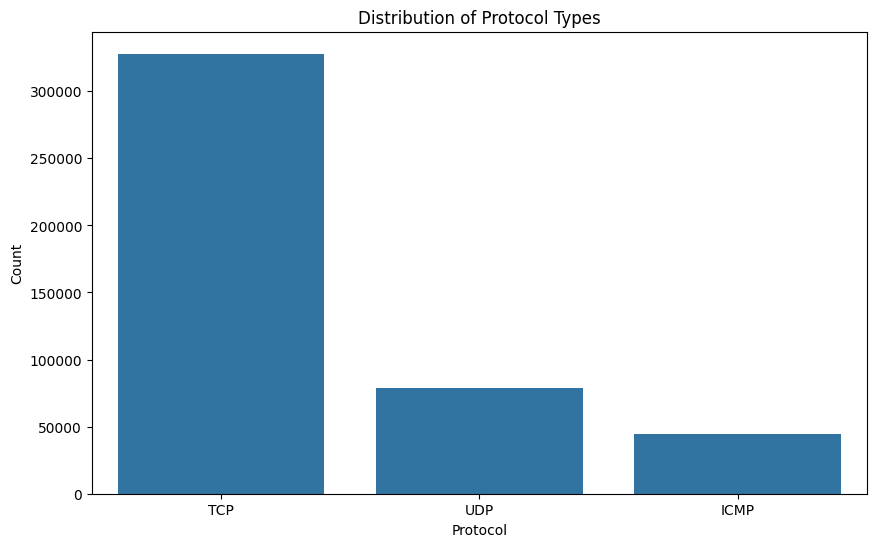

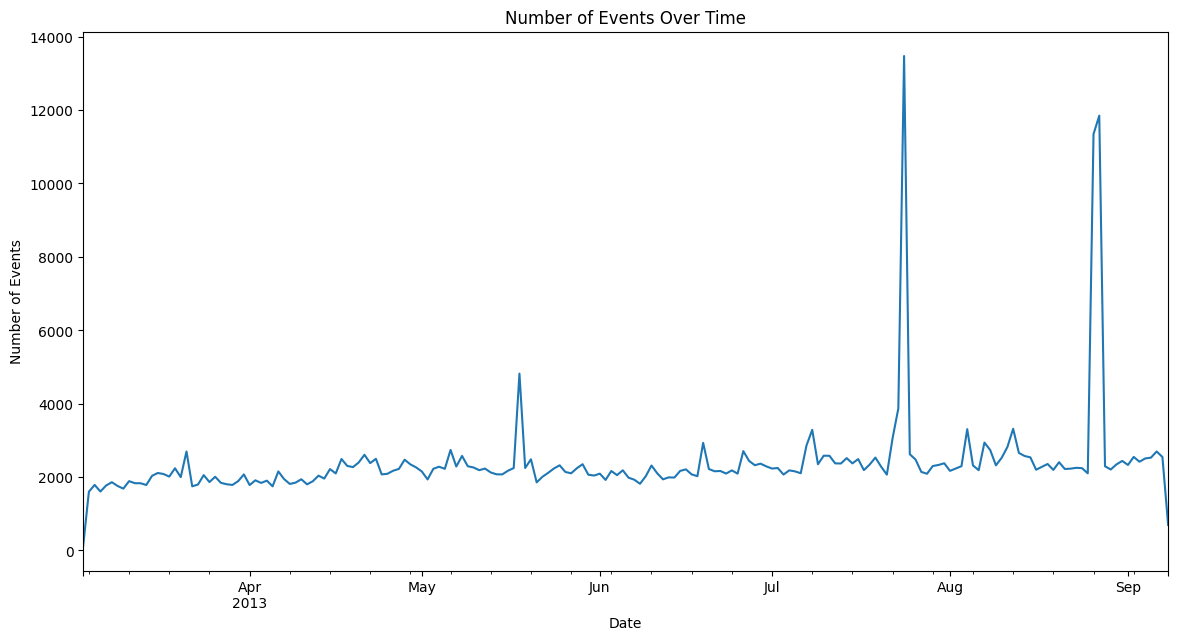

In [26]:
# Convert datetime to pandas datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Display the distribution of protocol types
plt.figure(figsize=(10, 6))
sns.countplot(x='proto', data=df)
plt.title('Distribution of Protocol Types')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

# Plot the number of events over time
df.set_index('datetime', inplace=True)
df['proto'].resample('D').count().plot(figsize=(14, 7))
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# Reset the index for further analysis
df.reset_index(inplace=True)

## Chi-Squared Test: Independence between 'country' and 'proto'

### Explanation:

The Chi-Squared Test is a statistical test used to determine if there is a significant association between two categorical variables. It tests the null hypothesis that the variables are independent. In this context, we are testing the independence between the 'country' and 'proto' (protocol) variables in our dataset. In the context of network traffic analysis, "proto" typically stands for "protocol." The protocol is a set of rules or standards used to communicate between devices in a network.  It would make sense certain countries which regulate their internet independetly or in groups such as the EU would have differnt protocals for internet. 

**Steps:**
1. **Contingency Table**: Create a contingency table showing the frequency distribution of the variables 'country' and 'proto'.
2. **Chi-Squared Test**: Calculate the chi-squared statistic, degrees of freedom, and p-value using the `chi2_contingency` function from the `scipy.stats` module.
3. **Interpretation**: If the p-value is less than a chosen significance level (typically 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables.

Chi-Squared Test: chi2 = 161888.01048323823, p-value = 0.0


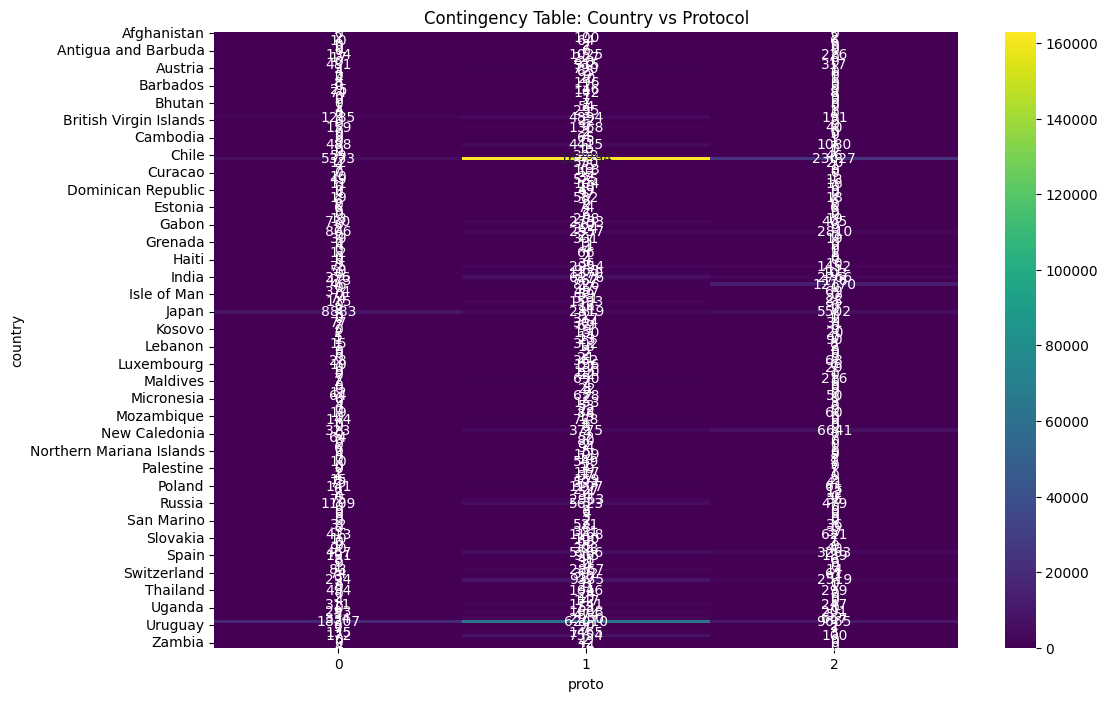

In [28]:
from scipy.stats import chi2_contingency

# Chi-Squared Test: Independence between 'country' and 'proto'
contingency_table = pd.crosstab(df['country'], df['proto'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Squared Test: chi2 = {chi2}, p-value = {p}')

# Visualization for Chi-Squared Test
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Contingency Table: Country vs Protocol')
plt.show()


## Correlation Analysis: Relationship between 'spt' and 'dpt'

### Explanation:

In network traffic analysis:
- **spt** stands for **Source Port**, which is the port number from which the traffic originates on the source device.
- **dpt** stands for **Destination Port**, which is the port number to which the traffic is directed on the destination device.

### Spearman's Rank Correlation:

Spearman's rank correlation (Spearman's rho) is a non-parametric test used to measure the strength and direction of association between two ranked variables. It assesses how well the relationship between two variables can be described using a monotonic function. Unlike Pearson's correlation, Spearman's correlation does not assume that the data is normally distributed.

**Steps:**
1. **Data Preparation**: Remove rows with missing values in 'spt' and 'dpt'.
2. **Spearman Correlation Calculation**: Compute the Spearman correlation coefficient and the p-value using the `spearmanr` function from the `scipy.stats` module.
3. **Interpretation**: A Spearman correlation coefficient close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a coefficient close to 0 indicates no relationship. The p-value indicates the statistical significance of the correlation.
 
 A coefficent near 0 shows low correlation meaning that the two are nearly independent of one another. However  the p-value is less than 0.05, indicating that the correlation is statistically significant. We can reject the null hypothesis of no correlation.

Spearman Correlation between spt and dpt: correlation coefficient = 0.10906496336610637, p-value = 0.0


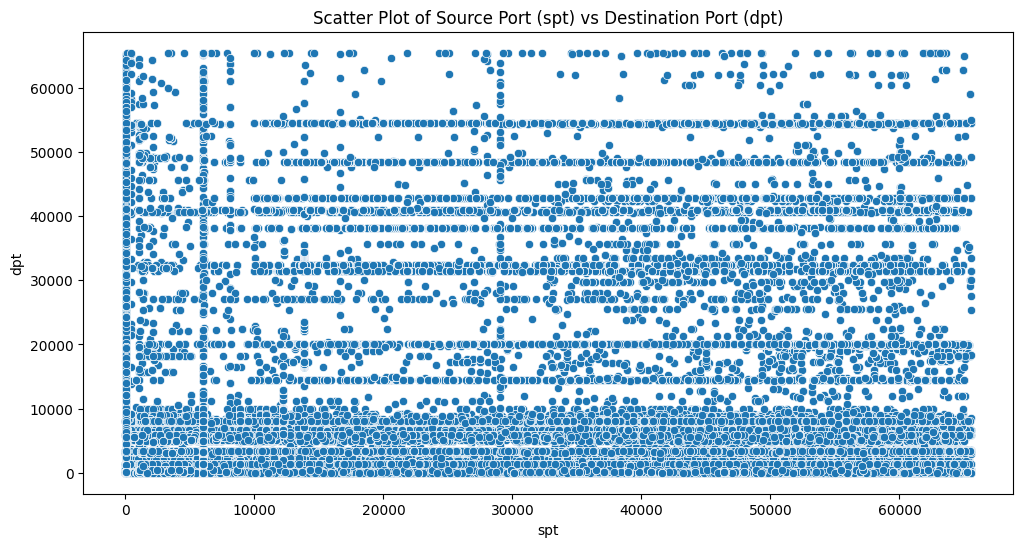

In [30]:
from scipy.stats import spearmanr

# Correlation Analysis: Relationship between 'spt' and 'dpt'
# Remove rows with NaN values in 'spt' and 'dpt'
df_corr = df.dropna(subset=['spt', 'dpt'])

# Calculate Spearman correlation
corr_coeff, p_value = spearmanr(df_corr['spt'], df_corr['dpt'])
print(f'Spearman Correlation between spt and dpt: correlation coefficient = {corr_coeff}, p-value = {p_value}')

# Visualization for Correlation Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='spt', y='dpt', data=df_corr)
plt.title('Scatter Plot of Source Port (spt) vs Destination Port (dpt)')
plt.show()

             datetime  hour time_of_day
0 2013-03-03 21:53:00    21       Night
1 2013-03-03 21:57:00    21       Night
2 2013-03-03 21:58:00    21       Night
3 2013-03-03 21:58:00    21       Night
4 2013-03-03 21:58:00    21       Night
                      sum_sq   df         F    PR(>F)
C(time_of_day)  1.428421e+09  3.0  0.302269  0.823116
Residual        1.260175e+10  8.0       NaN       NaN


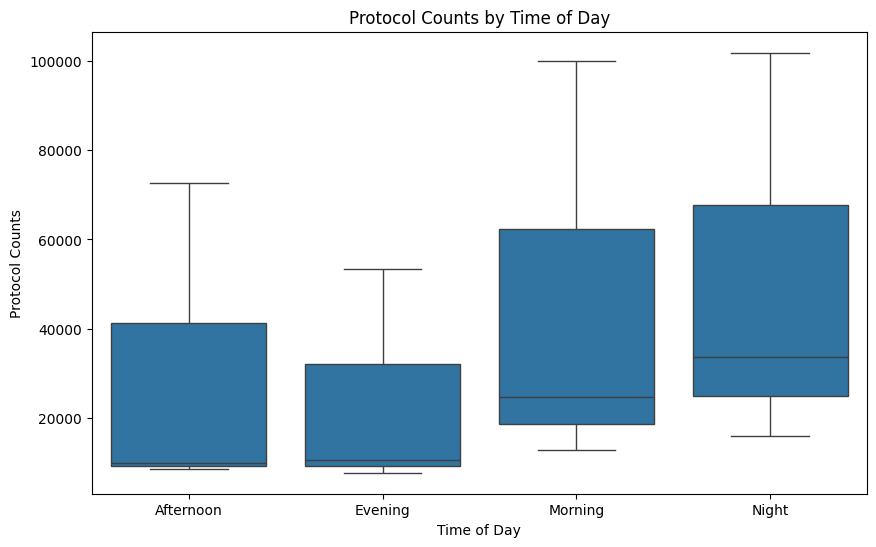

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'datetime' is already a datetime column
df['hour'] = df['datetime'].dt.hour

# Define function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time_of_day)
print(df[['datetime', 'hour', 'time_of_day']].head())

# Count occurrences of each protocol type by time of day
proto_counts = df.groupby(['time_of_day', 'proto']).size().reset_index(name='counts')

# Perform ANOVA test
model = ols('counts ~ C(time_of_day)', data=proto_counts).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Plot the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='counts', data=proto_counts)
plt.title('Protocol Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Protocol Counts')
plt.show()


# Explanation

### sum_sq (Sum of Squares):
This indicates the total variation in the data.

- C times of day has a sum of squares of  1.428421 * 10^9.
- The residual sum of squares (variation within groups) is 1.260175 * 10^10.

### df (Degrees of Freedom):
- The degrees of freedom for Time of Day is 3, corresponding to the four categories of time of day (Morning, Afternoon, Evening, Night).
- The residual degrees of freedom is 8.

### F (F-statistic):
The F-statistic value is 0.302269. This value is used to determine whether the observed variance between group means is significantly greater than the variance within groups.

### PR(>F) (p-value):
The p-value is 0.823116. This value indicates the probability of observing the data if the null hypothesis is true. A higher p-value suggests that any observed differences are likely due to random chance rather than a true effect.

# Interpretation

The p-value (0.823116) is much greater than the commonly used significance level of 0.05. This indicates that we fail to reject the null hypothesis, which means there is no significant difference in the protocol counts across different times of the day.

# Reason for Performing ANOVA

We performed an ANOVA test to investigate whether the time of day has a significant effect on the protocol counts. Given the nature of network traffic, one might hypothesize that certain protocols are more prevalent at different times of the day due to varying usage patterns. For instance, business-related protocols might be more common during working hours, while other protocols might be more prevalent during the evening or night.

# Conclusion

The ANOVA test results suggest that there is no significant difference in the counts of different protocols based on the time of day. This might imply that the distribution of protocol usage is fairly consistent throughout the day, or it could suggest that other factors are more influential in determining protocol usage patterns.

Further analysis could include investigating other potential factors or using more granular time intervals to see if finer time-of-day effects exist.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features and target variable
features = ['src', 'spt', 'dpt', 'latitude', 'longitude']
target = 'proto'

# Handle missing values for numeric columns
numeric_columns = df[features].select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Convert categorical target variable to numeric
df[target] = df[target].astype('category').cat.codes

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9968112315510923
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9075
           1       1.00      1.00      1.00     65423
           2       1.00      1.00      1.00     15819

    accuracy                           1.00     90317
   macro avg       1.00      0.99      0.99     90317
weighted avg       1.00      1.00      1.00     90317

